### Hi, Here i'm using google collaboratory for this assignment. I've imported student mental health dataset and i've some interesting manupulations of the given data. Let's have a look!

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import numpy as np   # Mathematical libaray in python which i may use
import pandas as pd  # Whenever we are dealing with a dataset we'll need it.
import matplotlib.pyplot as plt    # Visualization library
import seaborn as sns      # Visualization library
import sklearn   # analysis and computation library helps building various machine learning models.


In [75]:
# Importing the dataset which i've downloaded on my pc and then uploaded on my Google Drive.
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML notebooks/Student Mental health.csv')
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,08-07-2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,Yes,Yes,Yes,Yes,Yes
1,08-07-2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,08-07-2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,08-07-2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,08-07-2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [76]:
# Just basic visualization of data to know our dataset.

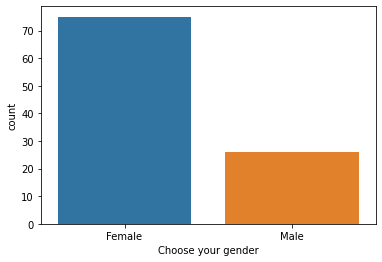

In [77]:
# The sex ratio.
sns.countplot(x= 'Choose your gender', data=df)

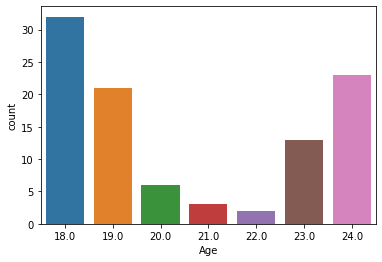

In [78]:
# Age
sns.countplot(x= 'Age', data=df)

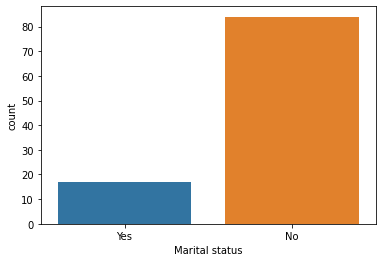

In [79]:
# Marital status
sns.countplot(x= 'Marital status', data=df)

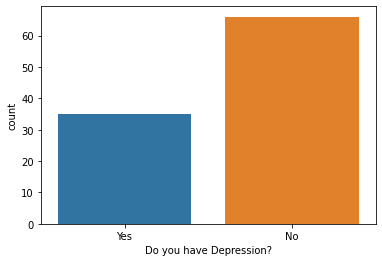

In [80]:
# Depression or not?
sns.countplot(x= 'Do you have Depression?', data=df)

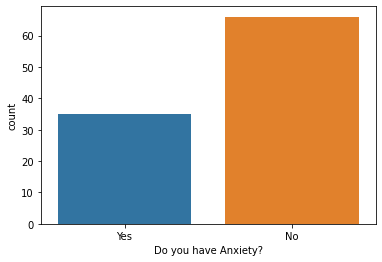

In [81]:
# Anxiety or not?
sns.countplot(x= 'Do you have Anxiety?', data=df)

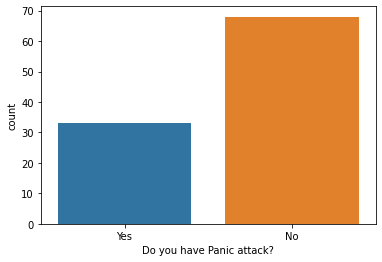

In [82]:
# Panic attack or not
sns.countplot(x= 'Do you have Panic attack?', data=df)

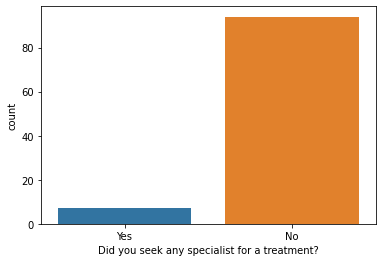

In [83]:
# Ailment or not
sns.countplot(x= 'Did you seek any specialist for a treatment?', data=df)


In [84]:
# Basic visualization is done.

##### As we can see a fair amount of people are suffering from either depression or anxiety yet a very few seek help.
#### Let's have better insights and make interesting conclusions.

# First

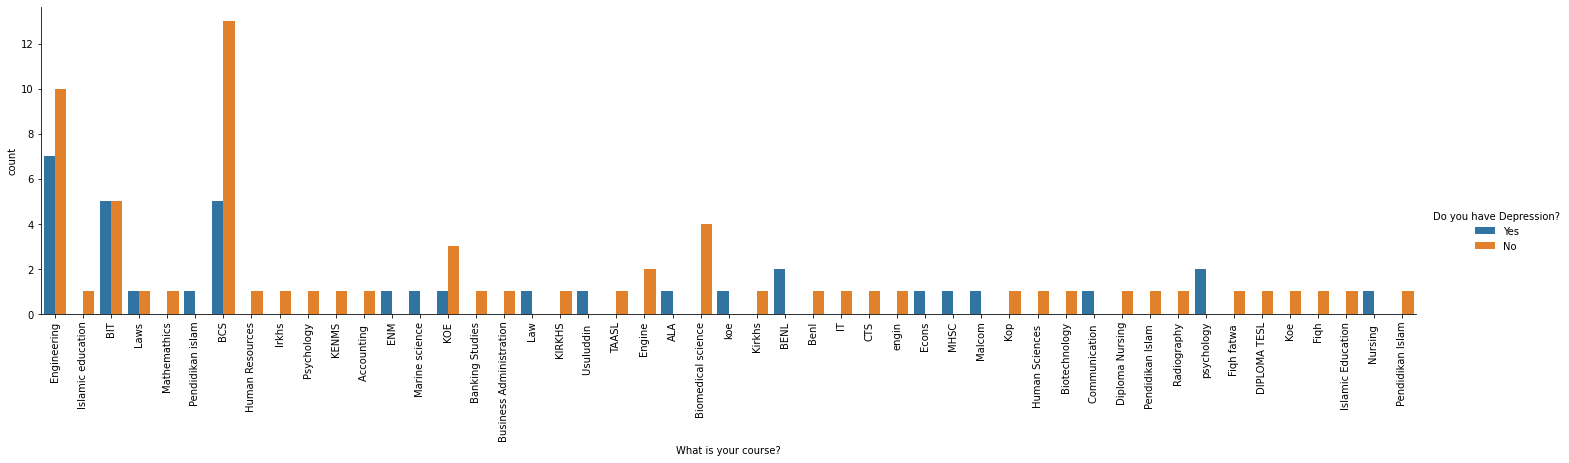

In [85]:
# Let's see which course students are suffering with most depression.
g=sns.catplot(x="What is your course?", hue="Do you have Depression?", kind="count", data=df, ci=None, aspect=4) 
g.set_xticklabels(rotation=90)

##### As we can see engineering students are the ones suffering with most depression and we know why. 
#### Now let's see if CGPA of a student impacts his/her's mental state.

# Second

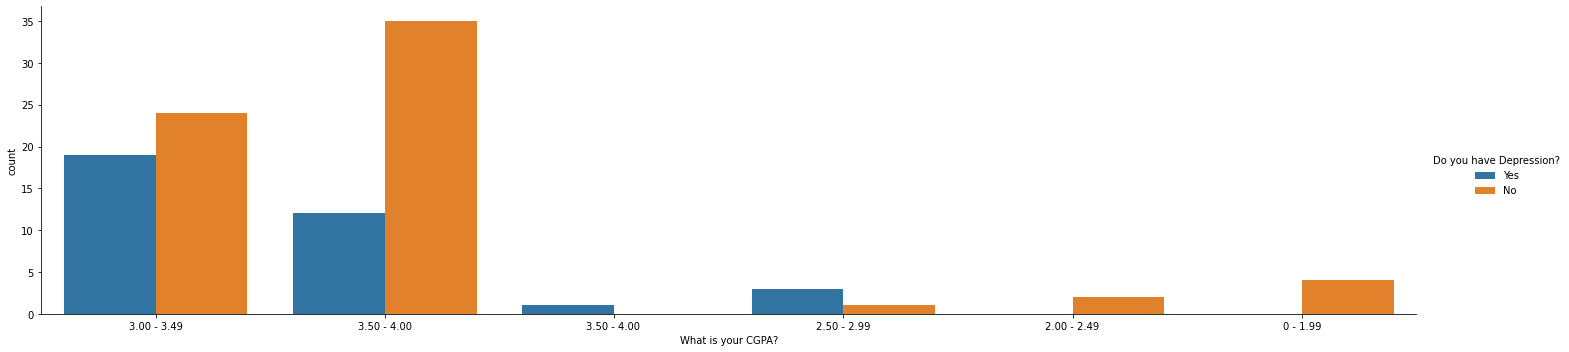

In [86]:
g1=sns.catplot(x="What is your CGPA?", hue="Do you have Depression?", kind="count", data=df, ci=None, aspect=4) 

##### Well kinda unexpected results here, but this survey shows that students with higher CGPA suffers with more depression. 
#### Let's check for anxiety.

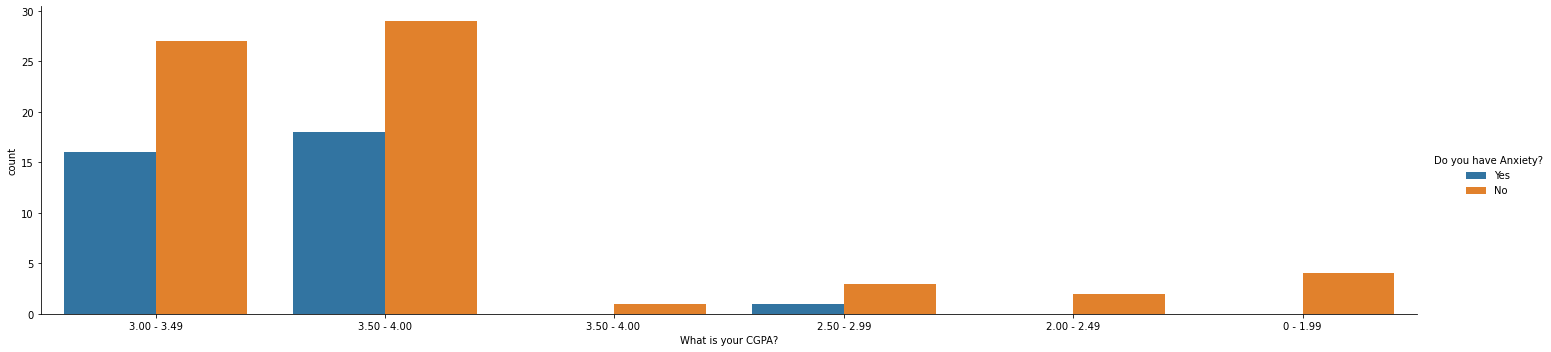

In [87]:
g1=sns.catplot(x="What is your CGPA?", hue="Do you have Anxiety?", kind="count", data=df, ci=None, aspect=4) 

##### Almost same results.

#### Nextly i want to make a Classifier prediction model on the basis of this survey using Logistic regression. 

# Third

In [88]:
# Independent and dependent variables
X= df.iloc[:,[1,2]]
Y=df.iloc[:,[9]]

##### We're fitting a model whether a person has a panic attack or not on the basis of their gender and age

In [89]:
X.head()      # Independent dataset

,Choose your gender,Age
0,Female,18.0
1,Male,21.0
2,Male,19.0
3,Female,22.0
4,Male,23.0


In [90]:
Y.head()    # Dependent dataset 

,Do you have Panic attack?
0,Yes
1,No
2,Yes
3,No
4,No


In [98]:
# I have to tell my machine what male and female signify here, so i've to encode them in a way my machine can understand.

from sklearn.preprocessing import LabelEncoder
ln= LabelEncoder()
X['Choose your gender']= ln.fit_transform(df['Choose your gender'])
X['Choose your gender']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      0
1      1
2      1
3      0
4      1
      ..
96     0
97     1
98     0
99     0
100    1
Name: Choose your gender, Length: 101, dtype: int64

In [99]:
X.head()

,Choose your gender,Age
0,0,18.0
1,1,21.0
2,1,19.0
3,0,22.0
4,1,23.0


In [105]:
X['Age'].fillna(18, inplace = True)   # Some students have not filled their age, so i'm replacing null values with age 18.

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [118]:
# Splitting dataset into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [108]:
# Applying our model

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [114]:
# Predicting values

Y_pred = log_regressor.predict(x_test)
Y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [115]:
# making a classification report

import sklearn.metrics as skim
print(skim.classification_report(Y_pred,y_test))

              precision    recall  f1-score   support

          No       1.00      0.67      0.80        21
         Yes       0.00      0.00      0.00         0

    accuracy                           0.67        21
   macro avg       0.50      0.33      0.40        21
weighted avg       1.00      0.67      0.80        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
# making the confusion matrix

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,Y_pred)
print(cm)


[[14  0]
 [ 7  0]]


##### So here our model is completed. I thought logistic regression would be a great way to show relationship in the dataset and can give us valuable information. 
I've explained everything i've done throughout my code. I thank you for this opportunity. Hoping for positive response.